In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import mrcnn.model as modellib
sys.path.append(os.path.join("samples/coco/"))
import coco
from mrcnn import utils
from mrcnn import visualize
from mrcnn.config import Config
from mrcnn.model import MaskRCNN

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join("logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join("mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join("images_examp")

/usr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [ ]:
class PredictionConfig(Config):
	DETECTION_MIN_CONFIDENCE = 0.8
	DETECTION_NMS_THRESHOLD = 0.2
    # define the name of the configuration
	NAME = "crusifixion_cfg"
	# number of classes (background + kangaroo)
	NUM_CLASSES = 1 + 40
	# simplify GPU config
	GPU_COUNT = 1
	IMAGES_PER_GPU = 1
    
cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model_path = '/home/bscuser/Downloads/mask_rcnn_crucifixion_cfg_0010.h5'
model.load_weights(model_path, by_name=True)










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [6]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
classes = ["BG","crucifixion","angel","person","crown of thorns", "horse", "dragon","bird","dog","boat","cat","book",
          "sheep","shepherd","elephant","zebra","crown","tiara","camauro","zucchetto","mitre","saturno","skull",  
          "orange","apple","banana","nude","monk","lance","key of heaven", "banner","chalice","palm","sword","rooster",
          "knight","scroll","lily","horn","prayer","tree"]

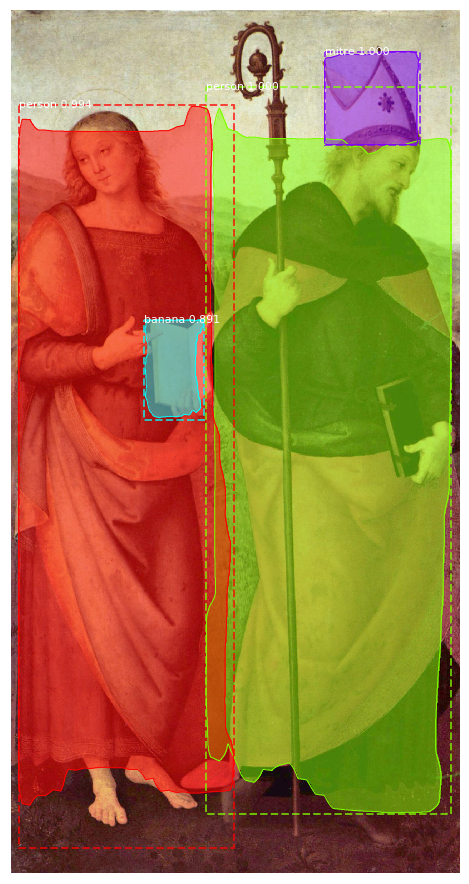

In [7]:
import pandas as pd
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
century=20
# Run detection
results = model.detect([image],verbose=0)[0]
# Visualize results
visualize.display_instances(image, results['rois'], results['masks'], results['class_ids'], 
                           classes, results['scores'])


In [8]:
century=13
res_time=model.time_matrix_application(image,century,classes)
visualize.display_instances(image, res_time['rois'], res_time['masks'], res_time['class_ids'], 
                           classes, res_time['scores'])

probs                    shape: (1, 1000, 41)         min:    0.00000  max:    1.00000  float32
INFO: Time-matrix was loaded correctly
INFO: Time-matrix didn't apply for class  person . 


KeyError: 0

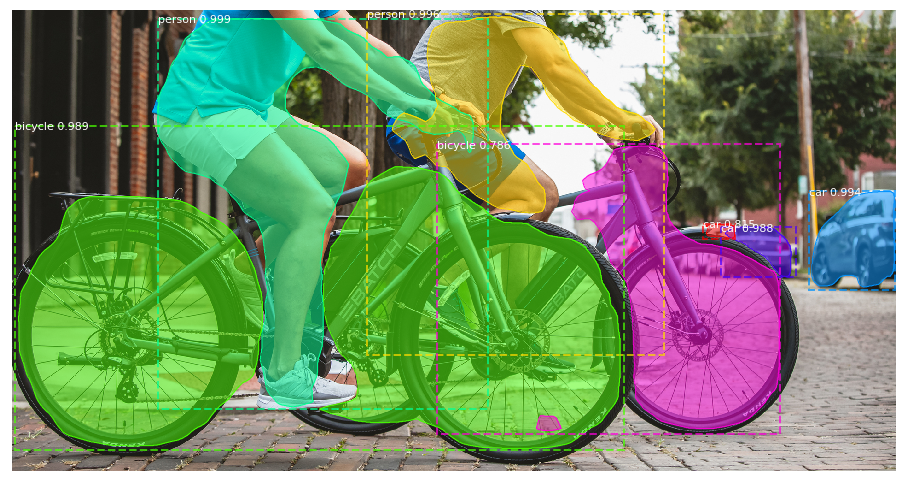

In [10]:
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
century=20
# Run detection
results = model.detect([image],verbose=0)[0]
# Visualize results
visualize.display_instances(image, results['rois'], results['masks'], results['class_ids'], 
                           classes, results['scores'])


probs                    shape: (1, 1000, 81)         min:    0.00000  max:    0.99999  float32
INFO: Time-matrix was loaded correctly
INFO: Time-matrix didn't apply for class  person . 
INFO: Time-matrix didn't apply for class  person . 
INFO: Options for class  car
         Name      Prob
3       truck  0.012431
1  motorcycle  0.003825
2      person  0.000885
0         bus  0.000112
INFO: For class  car  was chosen class  truck
INFO: Options for class  bicycle
         Name      Prob
3  motorcycle  0.021593
2       horse  0.010329
0       bench  0.009906
1       chair  0.004155
INFO: For class  bicycle  was chosen class  horse
INFO: Options for class  car
         Name      Prob
3       truck  0.012431
1  motorcycle  0.003825
2      person  0.000885
0         bus  0.000112
INFO: For class  car  was chosen class  truck
INFO: Options for class  car
         Name      Prob
1  motorcycle  0.003825
2      person  0.000885
0         bus  0.000112
INFO: For class  car  was chosen class  per

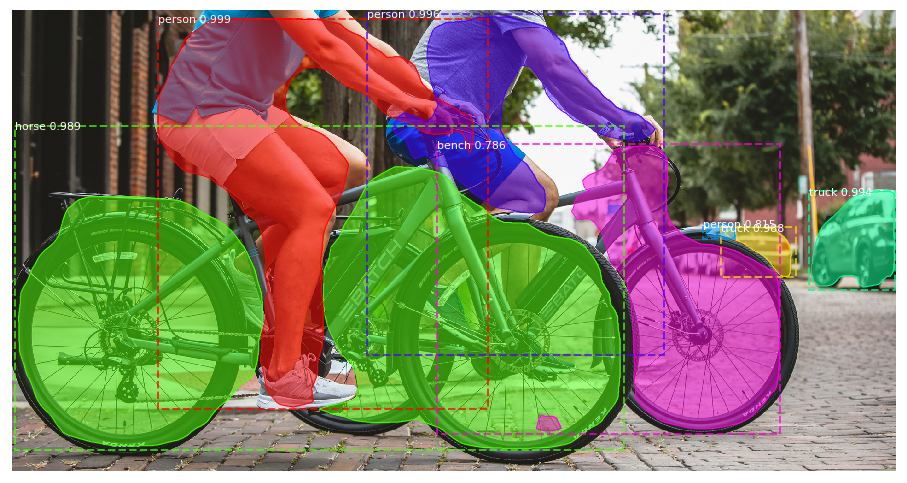

In [11]:
century=14
res_time=model.time_matrix_application(image,century,classes)
visualize.display_instances(image, res_time['rois'], res_time['masks'], res_time['class_ids'], 
                           classes, res_time['scores'])

In [9]:
from shapely.geometry import Polygon
import heapq
def overlap_detection(rect1,rect2):
    try:
        p1 = Polygon([(rect1[0],rect1[1]), (rect1[1],rect1[1]),(rect1[2],rect1[3]),(rect1[2],rect1[1])])
        p2 = Polygon([(rect2[0],rect2[1]), (rect2[1],rect2[1]),(rect2[2],rect2[3]),(rect2[2],rect2[1])])
        return(p1.intersects(p2))
    except:
        return True
    
def time_matrix_application(img,century):
    detection = model.detect([image],verbose=0)
    # Visualize results
    r = detection[0]
    mrcnn = model.run_graph([img], [("probs", model.keras_model.get_layer("mrcnn_class").output)])
    time_matrix=pd.read_csv("time_matrix.csv")
    print("INFO: Time-matrix loaded correctly")
    final_prob=pd.DataFrame()
    for i in mrcnn['probs'][0]:
        prob=pd.DataFrame()
        prob_data=[]
        for j in i: 
            prob_data.append("{:.12f}".format(float(j)))
        prob["Name"]=class_names
        prob["Prob"]=prob_data
        final_prob=pd.concat([final_prob,prob],axis=0, ignore_index=True)
    final_prob["Prob"]=final_prob["Prob"].astype(float)
    
    for object_id in range(0,len(r["class_ids"])):
        object_time=time_matrix[time_matrix["Item"]==class_names[r["class_ids"][object_id]]]
        #print(object_time)
        if object_time.reset_index().loc[0,"Cent"]>century:
            d_object=class_names[r["class_ids"][object_id]]
            middle_prop=pd.DataFrame(columns=["Name","Prob"])
            for i in range(0,len(final_prob),81):
                probs=[]
                for j in range(i,i+81):
                    # print(prob.loc[j,"Prob"])
                    probs.append(final_prob.loc[j,"Prob"])
                #print(probs)
                items=heapq.nlargest(4, range(len(probs)), key=probs.__getitem__)
                if class_names[items[0]]==d_object:
                    for it in range(1,len(items)):
                        if items[it] not in r["class_ids"]:
                            middle_prop.loc[len(middle_prop)]=[class_names[items[it]], probs[items[it]]]
                        else: 
                            position=np.where(r["class_ids"]==items[it])[0]
                            #print(position)
                            overlap_flag=False
                            for pos in position:
                                if overlap_detection(r["rois"][pos],r["rois"][object_id])==True:
                                    overlap_flag=True
                                    #print(pos)
                            if overlap_flag==False:
                                middle_prop.loc[len(middle_prop)]=[class_names[items[it]], probs[items[it]]]
            middle_prop=middle_prop[middle_prop["Name"]!="BG"]
            print("INFO: Matrix of possible classes for class ",d_object)
            print(middle_prop.groupby("Name", as_index=False).mean().sort_values(by=["Prob"],ascending=False))
            position_obj=0
            for num_obj, new_obj in middle_prop.groupby("Name", as_index=False).mean().sort_values(by=["Prob"],ascending=False).iterrows():
                #print(new_obj[0])
                if time_matrix[time_matrix["Item"]==new_obj[0]].reset_index().loc[0,"Cent"]<century:
                    position_obj=class_names.index(new_obj[0])
                    print("INFO: For class ",class_names[r["class_ids"][object_id]]," was chosen class ", new_obj[0])
                    break
            r["class_ids"][object_id]=position_obj
        else:
            print("INFO: Class ",class_names[r["class_ids"][object_id]], ". No need to apply time-matrix")
    return r